svm

Confusion Matrix:
[[76  0]
 [24 47]]

Best classification performance measures for the features.
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
SVM             DM       1.0000      0.7600      0.6620           1.0000           0.8367
SVM             CG       0.7600      1.0000      1.0000           0.6620          


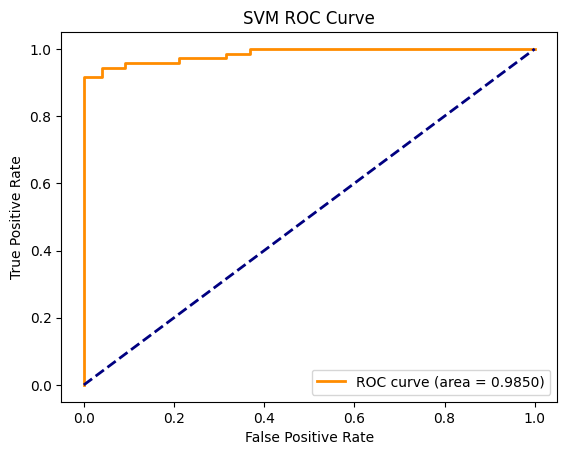

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

def evaluate_metrics(y_test, y_pred):
    """
    Calculate PPV, NPV, sensitivity, specificity for both classes correctly.
    """
    cm = confusion_matrix(y_test, y_pred)

    # Ensure we have a 2x2 confusion matrix for binary classification
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()

        # Calculate metrics for DM (class 1 / positive class)
        ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
        npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
        sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

        # Calculate metrics for CG (class 0 / negative class)
        ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
        npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
        sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Overall accuracy
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        metrics = {
            "DM": {
                "PPV": round(ppv_dm, 4),
                "NPV": round(npv_dm, 4),
                "Sensitivity": round(sensitivity_dm, 4),
                "Specificity": round(specificity_dm, 4),
            },
            "CG": {
                "PPV": round(ppv_cg, 4),
                "NPV": round(npv_cg, 4),
                "Sensitivity": round(sensitivity_cg, 4),
                "Specificity": round(specificity_cg, 4),
            },
            "Accuracy": round(accuracy, 4)
        }
    else:
        # Handle non-binary confusion matrices
        metrics = {"Error": "Not a binary classification result"}

    return cm, metrics

def plot_roc_curve(y_test, y_prob, model_name):
    """
    Plot ROC curve and save it.
    """
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.savefig(f"{model_name}_ROC.png")
    plt.show()

def svm_classifier(input_file):
    """
    Classify data using SVM and evaluate performance metrics.

    Args:
        input_file (str): Path to the Excel file containing descriptors and labels.
    """
    # Load the dataset
    df = pd.read_excel(input_file)

    # Extract features and labels
    X = df.iloc[:, 1:-1].values   # All descriptor columns (exclude filename and label)
    y = df['label'].values        # Label column

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train SVM classifier
    model = SVC(kernel="rbf", C=100, gamma=0.1, random_state=42, probability=True)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]   # Probability for ROC curve

    # Evaluate metrics
    cm, metrics = evaluate_metrics(y_test, y_pred)

    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Print metrics in a formatted table like the image reference
    print("\nBest classification performance measures for the features.")
    print("-" * 100)
    print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
    print("-" * 100)

    # Print DM metrics
    print(f"{'SVM':<15} {'DM':<8} {metrics['DM']['PPV']:.4f}{'':<5} "
          f"{metrics['DM']['NPV']:.4f}{'':<5} {metrics['DM']['Sensitivity']:.4f}{'':<10} "
          f"{metrics['DM']['Specificity']:.4f}{'':<10} {metrics['Accuracy']:.4f}")

    # Print CG metrics
    print(f"{'SVM':<15} {'CG':<8} {metrics['CG']['PPV']:.4f}{'':<5} "
          f"{metrics['CG']['NPV']:.4f}{'':<5} {metrics['CG']['Sensitivity']:.4f}{'':<10} "
          f"{metrics['CG']['Specificity']:.4f}{'':<10}")

    # Plot ROC curve
    plot_roc_curve(y_test, y_prob, "SVM")

    return metrics

# Example usage
input_file = '/content/balanced_resnet50_wf.xlsx'   # Replace with your dataset file path
results = svm_classifier(input_file)


dt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Function to calculate metrics
def evaluate_metrics(y_test, y_pred):
    """
    Calculate PPV, NPV, sensitivity, specificity for both classes.
    """
    cm = confusion_matrix(y_test, y_pred)

    # Ensure we have a 2x2 confusion matrix for binary classification
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()

        # Metrics for DM (class 1)
        ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
        npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
        sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

        # Metrics for CG (class 0)
        ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
        npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
        sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Overall accuracy
        accuracy = accuracy_score(y_test, y_pred)

        metrics = {
            "DM": {
                "PPV": round(ppv_dm, 4),
                "NPV": round(npv_dm, 4),
                "Sensitivity": round(sensitivity_dm, 4),
                "Specificity": round(specificity_dm, 4),
            },
            "CG": {
                "PPV": round(ppv_cg, 4),
                "NPV": round(npv_cg, 4),
                "Sensitivity": round(sensitivity_cg, 4),
                "Specificity": round(specificity_cg, 4),
            },
            "Accuracy": round(accuracy, 4)
        }
    else:
        metrics = {"Error": "Not a binary classification result"}

    return cm, metrics

# Decision Tree Classifier Implementation
def decision_tree_classifier(input_file):
    """
    Classify data using Decision Tree and evaluate performance metrics.

    Args:
        input_file (str): Path to the Excel file containing descriptors and labels.
    """
    # Load the dataset
    df = pd.read_excel(input_file)

    # Extract features and labels
    X = df.iloc[:, :-1].values   # All descriptor columns except the label column
    y = df['label'].values       # Label column

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train Decision Tree classifier with constrained depth to reduce overfitting
    model = DecisionTreeClassifier(max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate metrics
    cm, metrics = evaluate_metrics(y_test, y_pred)

    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Print metrics in a formatted table like the image reference
    print("\nBest classification performance measures for the features.")
    print("-" * 100)
    print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
    print("-" * 100)

    # Print DM metrics
    print(f"{'DT':<15} {'DM':<8} {metrics['DM']['PPV']:.4f}{'':<5} "
          f"{metrics['DM']['NPV']:.4f}{'':<5} {metrics['DM']['Sensitivity']:.4f}{'':<10} "
          f"{metrics['DM']['Specificity']:.4f}{'':<10} {metrics['Accuracy']:.4f}")

    # Print CG metrics
    print(f"{'DT':<15} {'CG':<8} {metrics['CG']['PPV']:.4f}{'':<5} "
          f"{metrics['CG']['NPV']:.4f}{'':<5} {metrics['CG']['Sensitivity']:.4f}{'':<10} "
          f"{metrics['CG']['Specificity']:.4f}{'':<10}")

# Example usage
input_file = '/content/balanced_alexnet_wf.xlsx'   # Replace with your dataset file path
decision_tree_classifier(input_file)


Confusion Matrix:
[[60 16]
 [ 7 64]]

Best classification performance measures for the features.
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
DT              DM       0.8000      0.8955      0.9014           0.7895           0.8435
DT              CG       0.8955      0.8000      0.7895           0.9014          


knn

Best classification performance measures for the features.
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
KNN             DM       0.7903      1.0000      1.0000           0.7347           0.8673
KNN             CG       1.0000      0.7903      0.7347           1.0000          


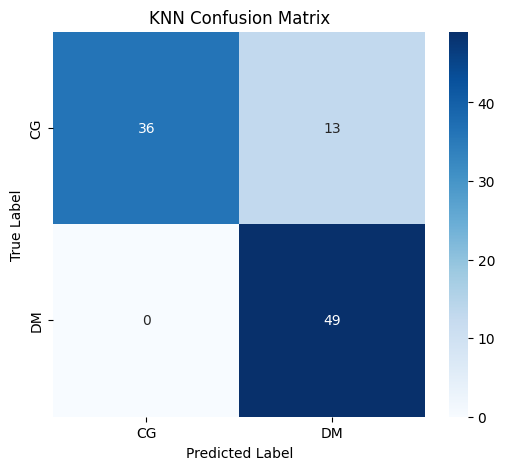

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing features
csv_path = "/content/balanced_resnet50_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])  # Feature vectors
y = df["label"]  # Class labels

# Convert boolean labels to numerical (False → 0 for CG, True → 1 for DM)
y = y.astype(int)

# Standardize features to improve KNN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format similar to the reference image
print("Best classification performance measures for the features.")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'KNN':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'KNN':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix")
plt.show()


lda

Best classification performance measures for the features.
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
LDA             DM       0.8235      0.8511      0.8571           0.8163           0.8367
LDA             CG       0.8511      0.8235      0.8163           0.8571          


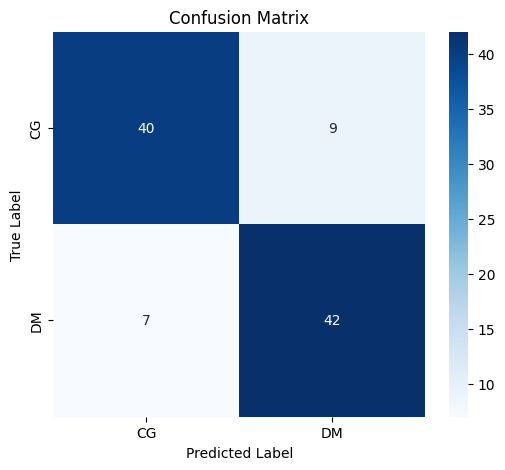

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing features
csv_path = "/content/balanced_alexnet_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'Label' column for classification.")

# Separate features and labels
X = df.drop(columns=[ "label"])  # Feature vectors
y = df["label"]  # Class labels

# Convert boolean labels to numerical (False → 0 for CG, True → 1 for DM)
y = y.astype(int)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on test data
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics for both classes
# For DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# For CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format similar to the reference image
print("Best classification performance measures for the features.")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'LDA':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'LDA':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


nb

Best classification performance measures for the features.
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
NB              DM       0.9375      0.9200      0.9184           0.9388           0.9286
NB              CG       0.9200      0.9375      0.9388           0.9184          


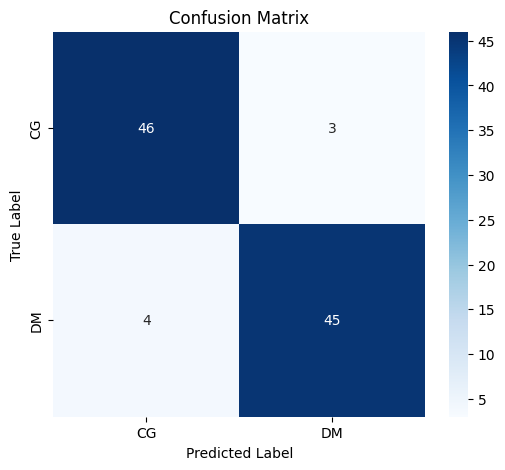

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing features
csv_path = "/content/balanced_resnet50_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'Label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])  # Feature vectors
y = df["label"]  # Class labels

# Convert boolean labels to numerical (False → 0 for CG, True → 1 for DM)
y = y.astype(int)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on test data
y_pred = nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics for both classes
# For DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# For CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format similar to the reference image
print("Best classification performance measures for the features.")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'NB':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'NB':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


nn

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6991 - loss: 0.5162 - val_accuracy: 0.9487 - val_loss: 0.1374
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9924 - loss: 0.0582 - val_accuracy: 0.9744 - val_loss: 0.0822
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 0.9744 - val_loss: 0.0726
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.9744 - val_loss: 0.0692
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9744 - val_loss: 0.0676
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9744 - val_loss: 0.0690
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9744 - val_loss: 0.0683
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9744 - val_loss: 0.0695

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Best classification performance measures for the features.
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
NN              DM       1.0000      1.0000      1.0000           1.0000           1.0000
NN              CG       1.0000      1.0000      1.0000           1.0000          


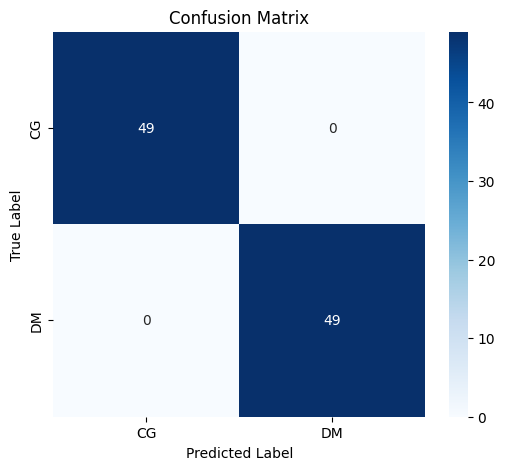

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing features
csv_path = "/content/balanced_resnet50_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'Label' column for classification.")

# Separate features and labels
X = df.drop(columns=[ "label"])  # Feature vectors
y = df["label"]  # Class labels

# Convert boolean labels to numerical (False → 0 for CG, True → 1 for DM)
y = y.astype(int)

# Standardize features to improve NN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Neural Network model using Keras Sequential API
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with ReLU activation
    Dense(32, activation='relu'),                                  # Hidden layer with ReLU activation
    Dense(1, activation='sigmoid')                                 # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on training data
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics for both classes
# For DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# For CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format similar to the reference image
print("Best classification performance measures for the features.")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'NN':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'NN':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5908 - loss: 0.9824 - val_accuracy: 0.7288 - val_loss: 0.8476
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7543 - loss: 0.8104 - val_accuracy: 0.8644 - val_loss: 0.7571
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8083 - loss: 0.7104 - val_accuracy: 0.8644 - val_loss: 0.6952
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8987 - loss: 0.5970 - val_accuracy: 0.8644 - val_loss: 0.6499
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9067 - loss: 0.5927 - val_accuracy: 0.8644 - val_loss: 0.6247
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8857 - loss: 0.5219 - val_accuracy: 0.8644 - val_loss: 0.6001
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9121 - loss: 0.4785 - val_accuracy: 0.8983 - val_loss: 0.5833
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9168 - loss: 0.4785 - val_accuracy: 0.8983 - val_loss: 0.5660
Epoch 9/20


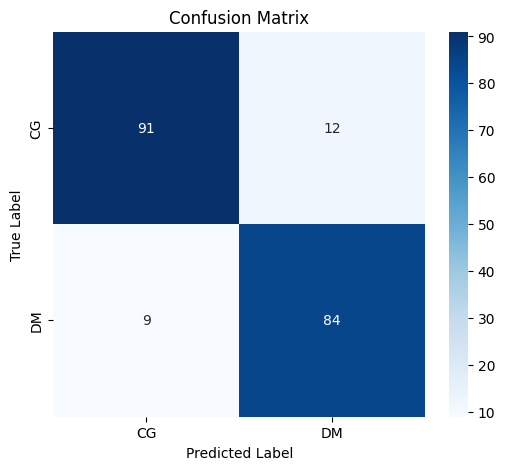

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing features
csv_path = "/content/balanced_alexnet_wf.xlsx"
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# STRATEGY 1: Use only a subset of features (e.g., 70%)
# This reduces the information available to the model
feature_count = X.shape[1]
selected_features = np.random.choice(feature_count, size=int(feature_count * 0.7), replace=False)
X_reduced = X.iloc[:, selected_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# STRATEGY 2: Reduce training data size (use 60% instead of 80%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# STRATEGY 3: Add noise to training data
noise_level = 0.5  # Adjust this value to control accuracy reduction
X_train_noisy = X_train + np.random.normal(0, noise_level, X_train.shape)

# STRATEGY 4: Build a simpler NN with regularization and dropout
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Smaller first layer with L2 regularization
    Dropout(0.3),  # Add dropout to reduce overfitting
    Dense(8, activation='relu'),  # Smaller hidden layer
    Dropout(0.3),  # More dropout
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# STRATEGY 5: Train for fewer epochs with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=False)  # Note: not restoring best weights

# Train the model on noisy training data
history = model.fit(
    X_train_noisy, y_train,
    epochs=20,  # Reduced from 50
    batch_size=32,  # Increased from 16
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate accuracy and metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics for both classes
# For DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# For CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features.")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'NN':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'NN':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
